In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 
              'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

# define polynomial feature function

In [3]:
def polynomial_dataframe(feature, degree):
    poly_data = pd.DataFrame()
    poly_data['power_1'] = feature
    if degree <= 1: return poly_data
    for i in range(2,degree+1):
        column = 'power_' + str(i)
        prev = 'power_' + str(i-1)
        poly_data[column] = poly_data[prev] * feature
    return poly_data

# sort by square feet in ascending order

In [5]:
sales = pd.read_csv('kc_house_data.csv/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

# degree 1 polynomial

In [6]:
poly1_data = polynomial_dataframe(sales['sqft_living'], degree=1)

In [7]:
model1 = LinearRegression()
model1.fit(poly1_data, sales['price'])

LinearRegression()

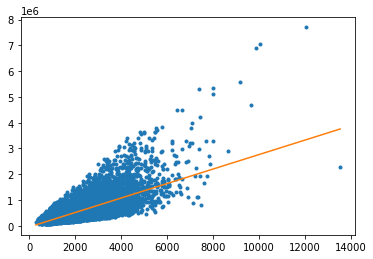

[280.6235679]


In [12]:
plt.plot(poly1_data['power_1'], sales['price'], '.')
plt.plot(poly1_data['power_1'], model1.predict(poly1_data), '-')
plt.show()
print(model1.coef_)

# degree 2,3 polynomials

[6.79940947e+01 3.85812609e-02]
[-9.01819864e+01  8.70465089e-02 -3.84055260e-06]


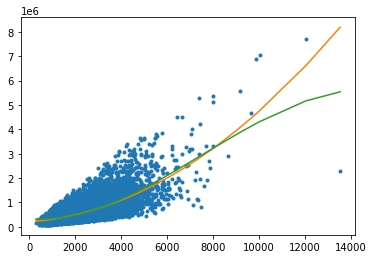

In [13]:
poly2_data = polynomial_dataframe(sales['sqft_living'], degree=2)
model2 = LinearRegression()
model2.fit(poly2_data, sales['price'])
print(model2.coef_)
poly3_data = polynomial_dataframe(sales['sqft_living'], degree=3)
model3 = LinearRegression()
model3.fit(poly3_data, sales['price'])
print(model3.coef_)

plt.plot(poly1_data['power_1'], sales['price'], '.')
# plt.plot(poly1_data['power_1'], model1.predict(poly1_data), '-')
plt.plot(poly2_data['power_1'], model2.predict(poly2_data), '-')
plt.plot(poly3_data['power_1'], model3.predict(poly3_data), '-')
plt.show()

# degree 15 polynomial, the variance looks large

[ 4.56404164e-91  6.91713416e-51  2.57713893e-56  2.78197887e-88
  1.19863929e-74  2.68575522e-71  2.26147568e-67  1.85900299e-63
  1.47144116e-59  1.09771012e-55  7.43509038e-52  4.23015578e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53]


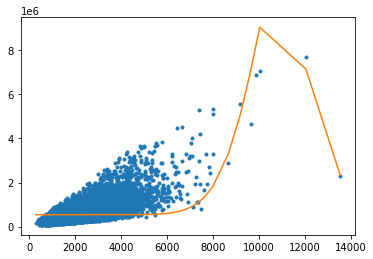

In [14]:
poly15_data = polynomial_dataframe(sales['sqft_living'], degree=15)
model15 = LinearRegression()
model15.fit(poly15_data, sales['price'])

print(model15.coef_)
plt.plot(poly1_data['power_1'], sales['price'], '.')
plt.plot(poly15_data['power_1'], model15.predict(poly15_data), '-')
plt.show()

# degree 15 polynomial on splitted data sets

set 1 [ 3.05794168e-90 -1.69394947e-49  2.35916674e-55  1.21888065e-88
  3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52]


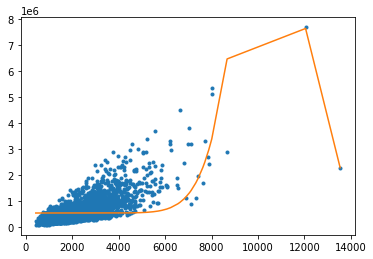

set 2 [ 2.71335948e-77  7.33541262e-39  9.00700956e-45  1.55763121e-49
  5.73786259e-71  1.51934987e-58  3.64549537e-55  1.50416257e-51
  5.76015663e-48  1.95770497e-44  5.39396537e-41  9.40376357e-38
 -3.63529140e-41  4.65476522e-45 -1.97199612e-49]


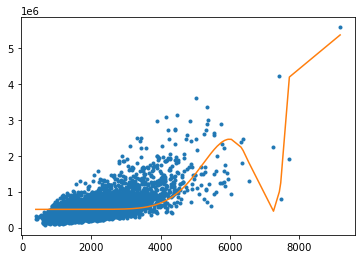

set 3 [ 2.83751934e-88 -7.80224169e-49 -1.38757615e-55 -3.98272978e-59
  1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
  9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
  3.33756141e-43 -6.76238818e-47  3.43132932e-51]


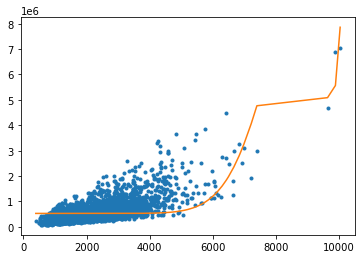

set 4 [ 1.37116050e-76  2.79678475e-40 -4.25068508e-44  8.70768439e-50
  2.58420332e-70  5.29002498e-58  1.27070045e-54  4.87868972e-51
  1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-37
 -9.43954119e-41  1.31573060e-44 -6.09163443e-49]


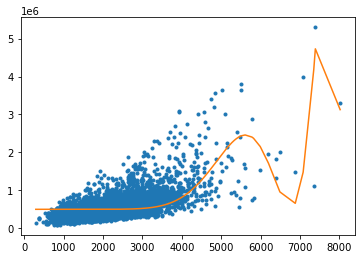

In [15]:
for i in range(1,5):
    salesi = pd.read_csv('wk3_kc_house_set_'+str(i)+'_data.csv/wk3_kc_house_set_'+str(i)+'_data.csv', dtype=dtype_dict)
    salesi = salesi.sort_values(['sqft_living','price'])
    polys_data = polynomial_dataframe(salesi['sqft_living'], degree=15)
    model = LinearRegression()
    model.fit(polys_data, salesi['price'])
    print('set '+str(i),model.coef_)
    plt.figure(i)
    plt.plot(polys_data['power_1'],salesi['price'], '.')
    plt.plot(polys_data['power_1'], model.predict(polys_data), '-')
    plt.show()

# model selection among different polynomial degrees

In [16]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv/wk3_kc_house_train_data.csv', dtype=dtype_dict)
train_data = train_data.sort_values(['sqft_living','price'])
test_data = pd.read_csv('wk3_kc_house_test_data.csv/wk3_kc_house_test_data.csv', dtype=dtype_dict)
test_data = test_data.sort_values(['sqft_living','price'])
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv/wk3_kc_house_valid_data.csv', dtype=dtype_dict)
valid_data = valid_data.sort_values(['sqft_living','price'])


In [17]:
def compute_RSS(model, input_features, output):
    totalSS = ((output - output.mean())**2).sum()
    RSS = (1 - model.score(input_features, output)) * totalSS
    return RSS

In [18]:
rss = []
for i in range(1,16):
    data = polynomial_dataframe(train_data['sqft_living'], degree=i)
    data_v = polynomial_dataframe(valid_data['sqft_living'], degree=i)
    model = LinearRegression()
    model.fit(data, train_data['price'])
    RSS = compute_RSS(model, data_v, valid_data['price'])
    rss.append(RSS)
    print(str(i)+" %.6e"%RSS)
num_degree = min(range(1,16), key= lambda i: rss[i-1])
print(num_degree)

1 6.290979e+14
2 6.239551e+14
3 6.258203e+14
4 6.299873e+14
5 6.282384e+14
6 5.662686e+14
7 1.073846e+15
8 7.087818e+15
9 4.530168e+16
10 2.474013e+17
11 1.193837e+18
12 5.208218e+18
13 7.616230e+17
14 2.297561e+18
15 6.955038e+18
6


In [19]:

data = polynomial_dataframe(train_data['sqft_living'], degree=num_degree)
data_t = polynomial_dataframe(test_data['sqft_living'], degree=num_degree)
model = LinearRegression()
model.fit(data, train_data['price'])
RSS = compute_RSS(model, data_t, test_data['price'])
rss.append(RSS)
print(str(num_degree)+" %.6e"%RSS)

6 1.352251e+14
